In [8]:
import tables  as tb
import pandas  as pd
import sqlite3 as sql
import numpy   as np
import re

import matplotlib.pyplot    as plt
import matplotlib           as mpl
from   mpl_toolkits.mplot3d import Axes3D

from invisible_cities.io import mcinfo_io as mio
from invisible_cities.io import dst_io    as dio

from next_sparseconvnet.data_io_scripts.plotting_utils import plot_3d_hits

In [2]:
def plot_3d_hits_double(hits, hits2, double = True, value='energy', coords = ['x', 'y', 'z'], cmap = mpl.cm.jet, value2 = 'E', coords2 = ['X', 'Y', 'Z'], opacity = 0.1, label1 = None, label2 = None):
    #Función para hacer plot de distintos hits de un mismo evento superponiéndose
    
    fig  = plt.figure(figsize=(15, 15), frameon=False)
    gs   = fig.add_gridspec(2, 40)
    ax   = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 18])
    norm = mpl.colors.Normalize(vmin=hits.loc[:, value].min(), vmax=hits.loc[:, value].max())

    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = np.asarray(np.vectorize(m.to_rgba)(hits.loc[:, value]))
    colors = np.rollaxis(colors, 0, 2)

    ax.scatter(hits[coords[0]], hits[coords[1]], hits[coords[2]], c=colors, marker='o', label = label1)
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')

    if double == True:
        
        norm2   = mpl.colors.Normalize(vmin=hits2.loc[:, value2].min(), vmax=hits2.loc[:, value2].max())

        m2      = mpl.cm.ScalarMappable(norm=norm2, cmap=cmap)

        colors2 = np.asarray(np.vectorize(m2.to_rgba)(hits2.loc[:, value2]))
        colors2 = np.rollaxis(colors2, 0, 2)

        ax.scatter(hits2[coords2[0]], hits2[coords2[1]], hits2[coords2[2]], c=colors2, marker='o', alpha = opacity, label = label2)
    
    ax.set_xlabel('X ')
    ax.set_ylabel('Y ')
    ax.set_zlabel('Z ')
    cb.set_label (value)
    if label1 != None:
        ax.legend()

    plt.show()

In [22]:
def get_cut_and_num(filename):
    cut = filename.split("/")[-1].split("_")[-2].split(".")[0]
    num = filename.split("/")[-1].split("_")[-1].split(".")[0]
    match = re.match(r"([a-z]+)([0-9]+)", cut, re.I)
    if match:
        items = match.groups()
    cutnum = items[-1]
    return cutnum, num

In [16]:
def get_event_id(cutnum, ev_num):
    #it gives the event id, that starts with the double of its cutnum, zeros and then the first event is
    #identified with the cutnum, and the subsecuent events just go adding one (for example, for the cut 51 the
    #first event is 102000051, the second 102000051 and so on)
    intcut = int(cutnum)
    return intcut * 2 * 1000000 + intcut + ev_num

We choose the cut and the num of the file we want to work with

In [33]:
cut, num = '51', '6206' 

Then we choose the event in the file

In [52]:
ev_num = 234

In [53]:
dir_penth = '/home/mperez/PHD/data/PenthesileaMarija/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut{cut}.dst_{num}.root.h5'.format(cut = cut, num = num)


In [54]:
nevent = get_event_id(cut, ev_num)
nevent

102000285

In [55]:
df_hits_MC = mio.load_mchits_df(dir_penth)
df_hits_penth = dio.load_dst(dir_penth, 'RECO', 'Events')

In [56]:
df_hits_MC

x           y           z          time  \
event_id  particle_id hit_id                                                    
102000051 14          0      -21.459600  195.908005  291.892853  2.407647e+11   
                      1      -21.719116  194.954849  291.827240  2.407647e+11   
                      2      -21.958040  194.009338  291.614136  2.407647e+11   
                      3      -22.263521  193.076447  291.443756  2.407647e+11   
                      4      -22.479322  192.115967  291.303833  2.407647e+11   
...                                 ...         ...         ...           ...   
102000610 23          0      -33.112457   69.233841  337.829224  2.750398e+10   
          24          0      -33.173126   69.215134  337.799866  2.750398e+10   
                      1      -33.196938   69.260857  337.813568  2.750398e+10   
                      2      -33.210827   69.280602  337.826447  2.750398e+10   
                      3      -33.210033   69.281296  337.827179  2.750398e+10   

                                energy   label  
event_id  particle_id hit_id                    
102000051 14          0       0.006864  ACTIVE  
                      1       0.002777  ACTIVE  
                      2       0.004462  ACTIVE  
                      3       0.003480  ACTIVE  
                      4       0.011234  ACTIVE  
...                                ...     ...  
102000610 23          0       0.000989  ACTIVE  
          24          0       0.004733  ACTIVE  
                      1       0.008783  ACTIVE  
                      2       0.014492  ACTIVE  
                      3       0.002041  ACTIVE  

[139527 rows x 6 columns]

In [57]:
df_hits_MC_event = df_hits_MC.loc[nevent]
df_hits_penth_event = df_hits_penth.loc[df_hits_penth['event'] == nevent]

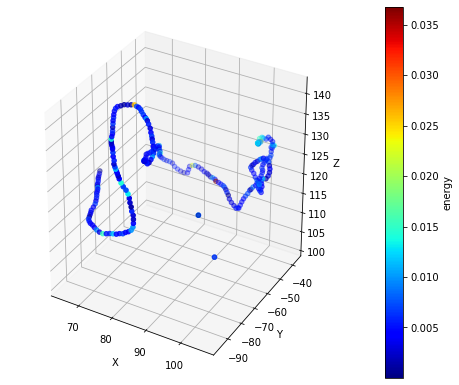

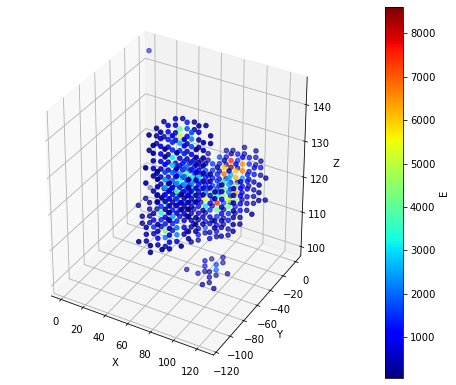

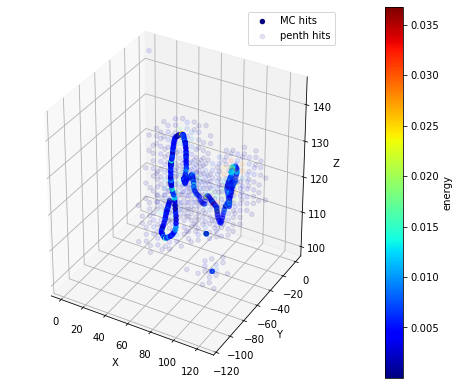

In [58]:
plot_3d_hits(df_hits_MC_event)
plot_3d_hits(df_hits_penth_event, value = 'E', coords = ['X', 'Y', 'Z'])
plot_3d_hits_double(df_hits_MC_event, df_hits_penth_event, label1 = 'MC hits', label2 = 'penth hits')

In [59]:
dir_bersh = '/home/mperez/PHD/data/beersheba_production/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut{cut}.beersheba_{num}.root.h5'.format(cut = cut, num = num)


In [60]:
df_hits_bersh = dio.load_dst(dir_bersh, 'DECO', 'Events')
df_hits_bersh_event = df_hits_bersh.loc[df_hits_bersh['event'] == nevent]

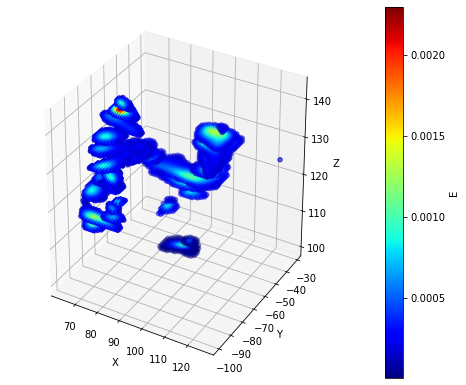

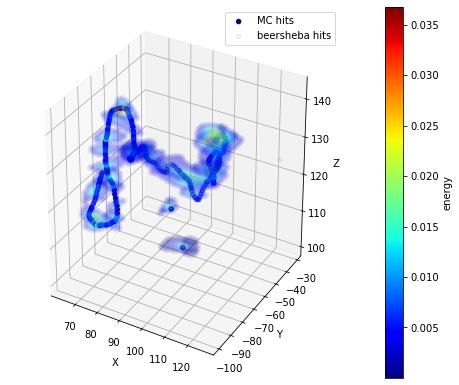

In [61]:
plot_3d_hits(df_hits_bersh_event, value = 'E', coords = ['X', 'Y', 'Z'])
plot_3d_hits_double(df_hits_MC_event, df_hits_bersh_event, opacity = 0.05, label1 = 'MC hits', label2 = 'beersheba hits')